In [42]:
import ete3
import argparse
import os
import shutil
import matplotlib.pyplot as plt

In [ ]:
parser = argparse.ArgumentParser()

parser.add_argument("folder", type=str)

arguments = parser.parse_args()

folder = arguments.organism_name

In [29]:
# Temporary path
prepath = f"../{folder}/data/raxmlng_trees/"
pretrees = os.listdir(prepath)
trees = []
for doc in pretrees:
    if doc.endswith("bestTree"):
        trees.append(doc)

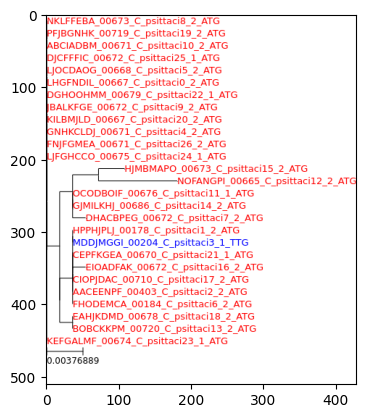

In [70]:
for tree in trees:
    mask = tree.split(".")[0]
    visualisation = ete3.Tree(os.path.join(prepath, tree))
    D_leaf_color = {"ATG":"red", "GTG":"green", "TTG":"blue"}
    for node in visualisation.traverse():
        node.img_style['size'] = 0
        if node.is_leaf():
            color = D_leaf_color.get(node.name[-3:], None)
            if color:
                name_face = ete3.TextFace(node.name, fgcolor=color, fsize=10)
                node.add_face(name_face, column=1, position='branch-right')
    ts = ete3.TreeStyle()
    ts.show_leaf_name = False
    visualisation.render(f"../{folder}/figures{mask}_ete3.png", tree_style=ts, dpi=300)